In [11]:
import pandas as pd
from src.plot import *
import numpy as np
from src.stat import chi_2
import datetime
from dateutil.relativedelta import relativedelta
pd.options.display.float_format = "{:,.2f}".format

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
#Select apropriate columns

numerical = df.select_dtypes('number').columns
dates = ['issue_d','earliest_cr_line','last_pymnt_d']
categorical = df.select_dtypes('object').columns
categorical = [c for c in categorical if c not in dates]

In [5]:
#convert dates

for d in dates:
    df[d] = pd.to_datetime(df[d],format='%b-%Y')

In [6]:
# convert term into no months

df['term'] = df['term'].str.extract(r'(\d{2})').astype('int')


In [7]:
# now I will check if letter in grade = letter in subgrade 

df['grade_check'] = df.apply(lambda x: x['grade'] in x['sub_grade'], axis = 1)

#all good DQ checked


In [8]:
default_columns = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['target'] = df['loan_status'].apply(lambda x: 1 if x in default_columns else 0)

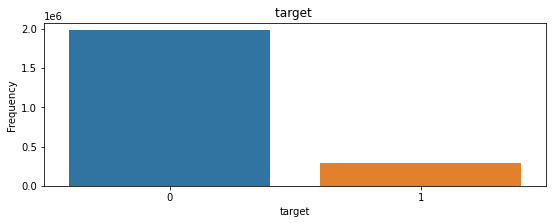

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [9]:
plot_cnt(df, 'target')

#looks like unbalanced dataset

In [9]:
# there is 12% default rate
df['target'].mean()

0.1257787521210545

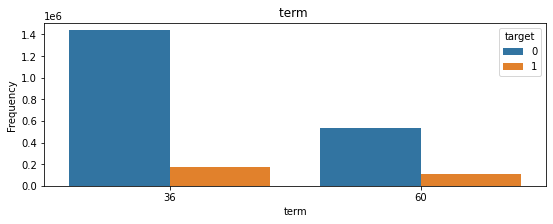

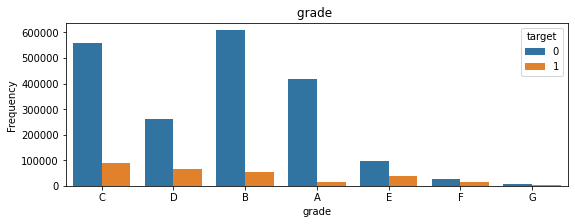

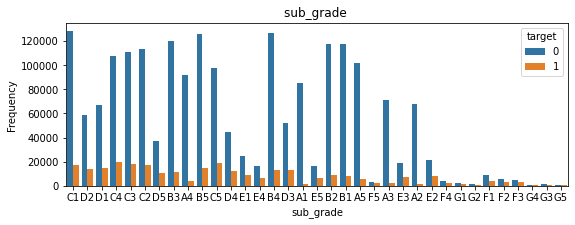

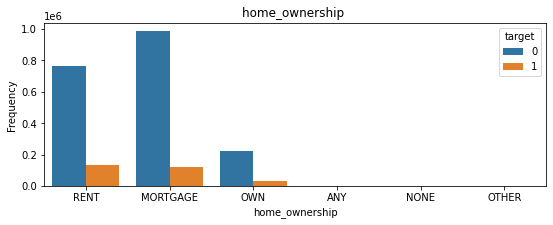

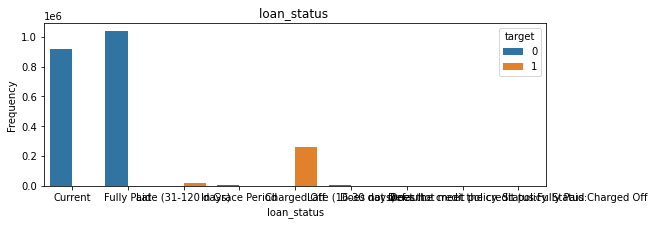

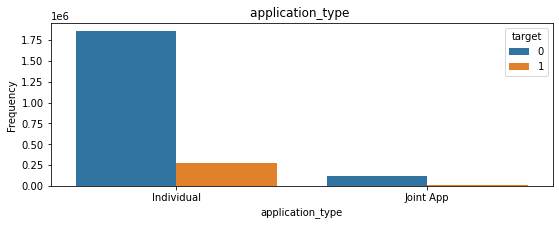

In [18]:
for c in categorical:
    plot_cnt(df,c, hue='target')

In [11]:
for c in categorical:
    print(c)
    chi_2(df, c)


# All categorical features have impact on target variable

term
chi_2 statistic: 17424.80
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
grade
chi_2 statistic: 117793.16
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
sub_grade
chi_2 statistic: 122147.03
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
home_ownership
chi_2 statistic: 6269.62
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
loan_status
chi_2 statistic: 2260668.00
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
application_type
chi_2 statistic: 4201.08
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [12]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0


In [14]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0


### New features

In [16]:
df['monthly_inc'] = df['annual_inc']/12
df['expected_payment_dt'] = df.apply(lambda x: x['issue_d'] + relativedelta(months=x['term']), axis =1)

In [17]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target,monthly_inc,expected_payment_dt
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0,"4,583.33",2021-12-01
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0,"7,500.00",2023-12-01
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0,"4,940.00",2021-12-01
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0,"7,666.67",2021-12-01
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0,"4,770.83",2023-12-01
